<a href="https://colab.research.google.com/github/niranjana2222/Classifying-Natural-and-Synthetic-Products/blob/main/models3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Get data
cancer = pd.read_csv('/content/descriptors2.csv')
#cancer['label'] = np.zeros((2525, 1)).tolist()
cancer['label'] = 0
cancer = cancer.dropna()
print("Size", cancer.shape)

drugs = pd.read_csv('/content/zinc.csv')
#drugs['label'] = np.ones((893, 1)).tolist()
drugs['label'] = 1
drugs = drugs.dropna()[:1289]
print("Size", drugs.shape)

data = pd.concat([cancer, drugs])

#Clean data
data = data.dropna()
#del data['smiles']
#data = data.drop('smiles',axis=1)
print("Size", data.shape)


Size (1999, 1876)
Size (4738, 1876)
Size (6737, 1876)


             nAcid        ALogP        ALogp2          AMR         apol  \
count  6737.000000  6737.000000  6.737000e+03  6737.000000  6737.000000   
mean      0.086982    -0.169043  1.760278e+00    51.936513    44.590363   
std       0.394256     1.316039  4.447390e+00    33.558605    12.575234   
min       0.000000   -12.994800  2.773339e-32     2.898000     8.231172   
25%       0.000000    -0.925500  1.413008e-01    29.325200    37.196137   
50%       0.000000    -0.142100  6.419214e-01    40.570800    43.324723   
75%       0.000000     0.648300  1.886228e+00    63.713900    50.010688   
max       6.000000     7.416100  1.688648e+02   322.969800   158.877720   

        naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
count  6737.000000  6737.000000  6737.000000  6737.000000  6737.000000  ...   
mean      9.671516    10.120677    37.882440    20.839988    17.042452  ...   
std       4.977742     5.308769    11.543749     5.697979     6.927859  ...   
min     

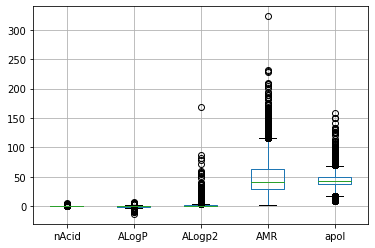

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Analyze Data####
print(data.describe())
print(data.head())
print("Size", data.shape)

corr = data.corr().abs()
corr2 = corr.unstack()
print(corr2.sort_values(kind="quicksort", ascending=False))
print("Corr\n", corr2.value_counts())

print((data.max()-data.min()).sort_values(kind="quicksort", ascending=False))
print("Range\n", (data.max()-data.min()).value_counts())

print(data.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Null\n", data.isnull().sum().value_counts().sort_values(kind="quicksort"))

corr3 = corr2.value_counts().rename_axis('unique_values').to_frame('counts')
print(corr3)

boxplot_nat = data.boxplot(column=['nAcid', 'ALogP', 'ALogp2' , 'AMR' , 'apol'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
labels = data['label']
print(labels)
del data['label']
print(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)


0       0
1       0
2       0
3       0
4       0
       ..
5323    1
5324    1
5325    1
5326    1
5327    1
Name: label, Length: 6737, dtype: int64
      nAcid   ALogP     ALogp2       AMR       apol  naAromAtom  nAromBond  \
0         0  0.3167   0.100299   93.1538  59.369790           0          0   
1         0 -0.1076   0.011578   12.5551   8.322758           0          0   
2         0 -6.1574  37.913575   71.4075  70.194478           0          0   
3         0  0.1474   0.021727  111.3365  59.298239          12         12   
4         0  2.0343   4.138376  111.6621  52.737102          17         17   
...     ...     ...        ...       ...        ...         ...        ...   
5323      0 -1.2522   1.568005   61.7782  50.799446           6          6   
5324      0  1.7848   3.185511   53.6111  43.480895           6          6   
5325      0  1.7848   3.185511   53.6111  43.480895           6          6   
5326      0  0.4061   0.164917   78.1234  55.182239           5       

MLP 0.9335311572700297


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


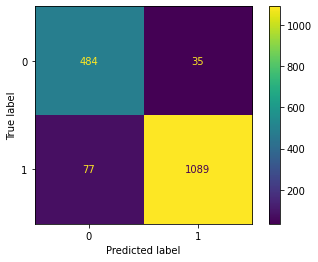

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       519
           1       0.97      0.93      0.95      1166

    accuracy                           0.93      1685
   macro avg       0.92      0.93      0.92      1685
weighted avg       0.94      0.93      0.93      1685



In [5]:
#MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
#mlp.predict_proba(X_test)
predictions = mlp.predict(X_test)
print("MLP", accuracy_score(y_test, predictions))

plot_confusion_matrix(mlp, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

NB 0.8201780415430268


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


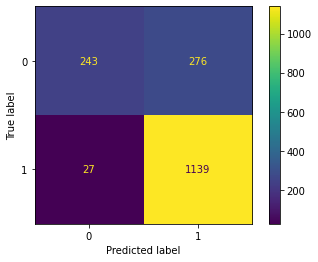

              precision    recall  f1-score   support

           0       0.90      0.47      0.62       519
           1       0.80      0.98      0.88      1166

    accuracy                           0.82      1685
   macro avg       0.85      0.72      0.75      1685
weighted avg       0.83      0.82      0.80      1685



In [6]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print("NB", accuracy_score(y_test, predictions))

plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

#print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

In [7]:
#train decision tree classifier
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

#train extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train,y_train)

#train random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

Decision Tree 0.9786350148367953


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


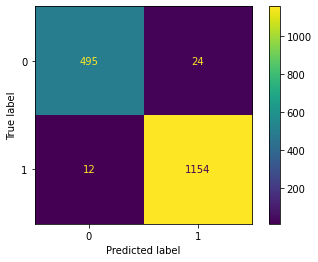

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       519
           1       0.98      0.99      0.98      1166

    accuracy                           0.98      1685
   macro avg       0.98      0.97      0.97      1685
weighted avg       0.98      0.98      0.98      1685



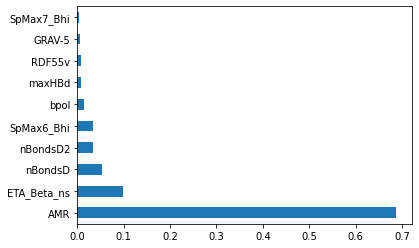

Feature: 0, Score: 0.68723


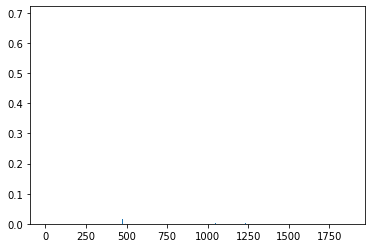

Feature: 1, Score: 0.09950


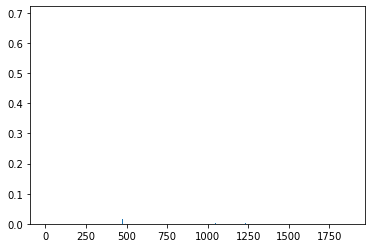

Feature: 2, Score: 0.05259


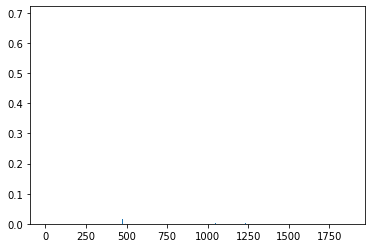

Feature: 3, Score: 0.03453


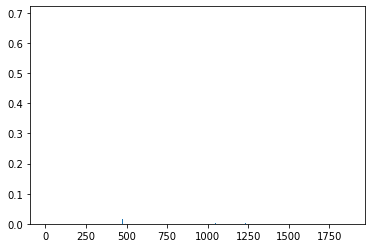

Feature: 4, Score: 0.03433


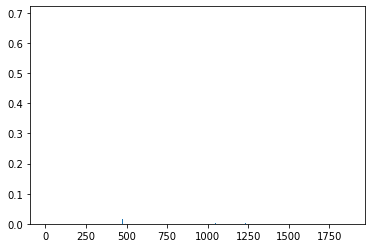

Feature: 5, Score: 0.01495


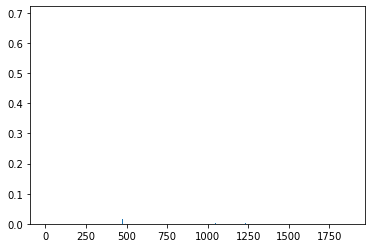

Feature: 6, Score: 0.00789


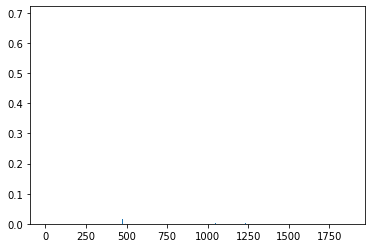

Feature: 7, Score: 0.00713


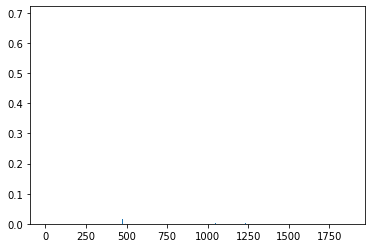

Feature: 8, Score: 0.00615


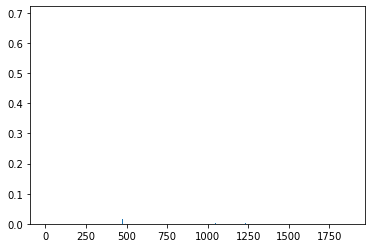

Feature: 9, Score: 0.00421


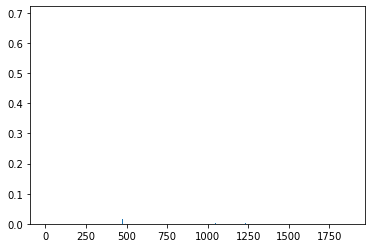

Extra Trees 0.9762611275964391


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


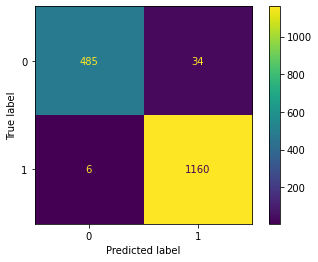

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       519
           1       0.97      0.99      0.98      1166

    accuracy                           0.98      1685
   macro avg       0.98      0.96      0.97      1685
weighted avg       0.98      0.98      0.98      1685



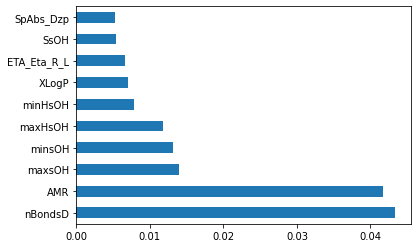

Feature: 0, Score: 0.04334


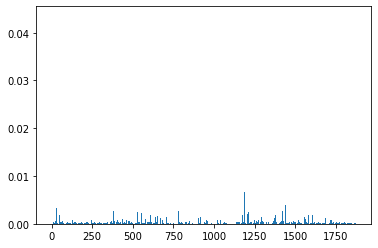

Feature: 1, Score: 0.04166


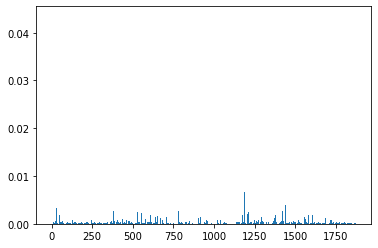

Feature: 2, Score: 0.01391


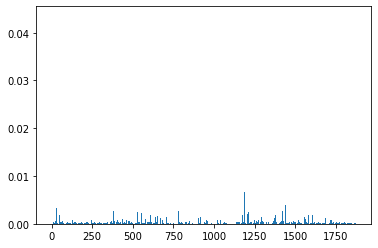

Feature: 3, Score: 0.01320


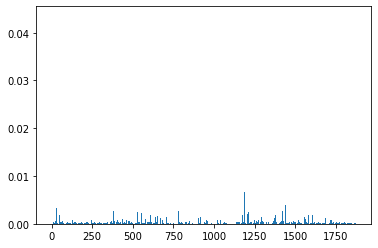

Feature: 4, Score: 0.01177


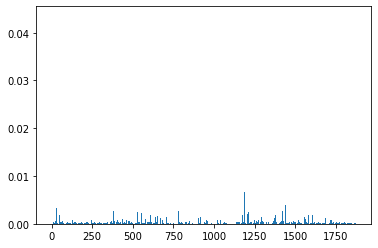

Feature: 5, Score: 0.00792


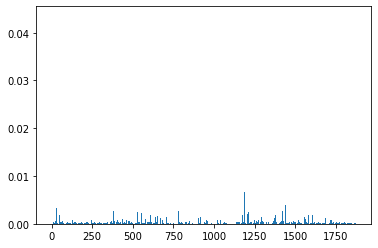

Feature: 6, Score: 0.00700


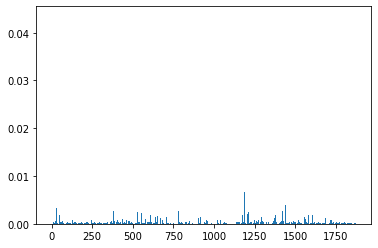

Feature: 7, Score: 0.00666


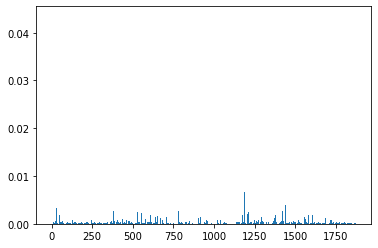

Feature: 8, Score: 0.00539


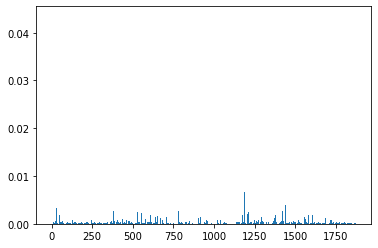

Feature: 9, Score: 0.00522


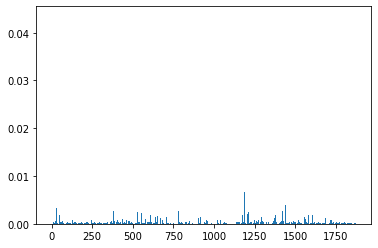

Random Forest 0.9905044510385757


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


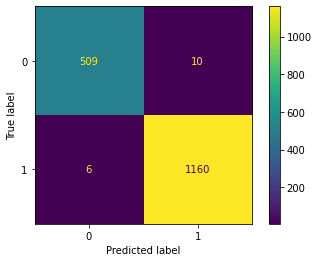

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       519
           1       0.99      0.99      0.99      1166

    accuracy                           0.99      1685
   macro avg       0.99      0.99      0.99      1685
weighted avg       0.99      0.99      0.99      1685



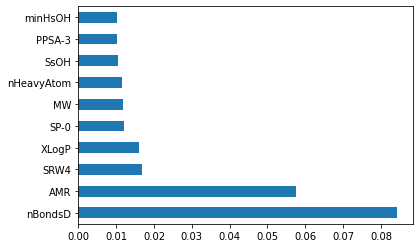

Feature: 0, Score: 0.08430


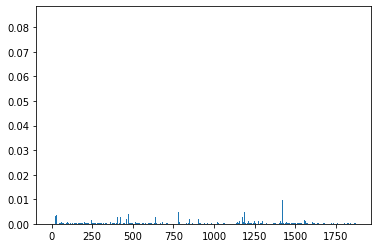

Feature: 1, Score: 0.05753


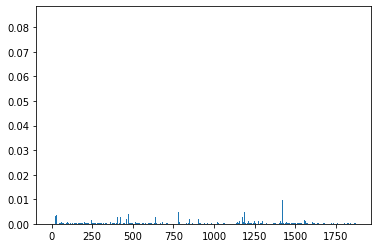

Feature: 2, Score: 0.01671


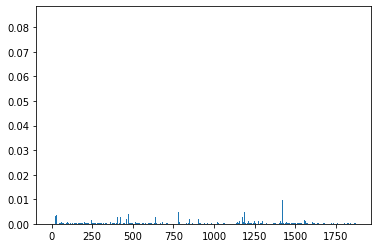

Feature: 3, Score: 0.01599


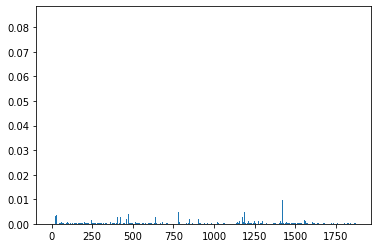

Feature: 4, Score: 0.01196


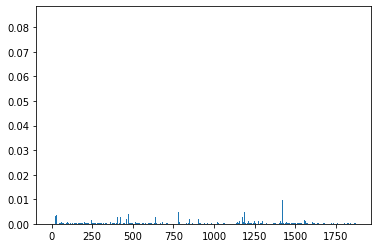

Feature: 5, Score: 0.01180


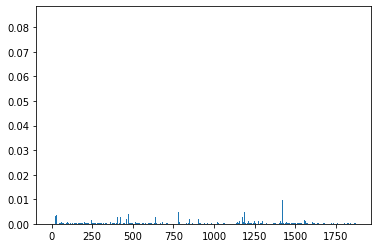

Feature: 6, Score: 0.01142


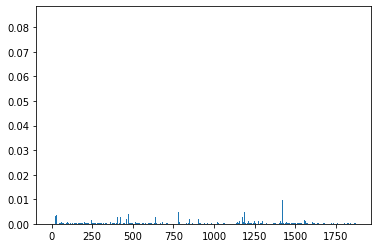

Feature: 7, Score: 0.01043


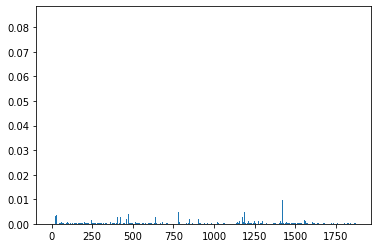

Feature: 8, Score: 0.01023


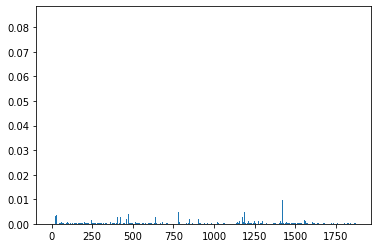

Feature: 9, Score: 0.01010


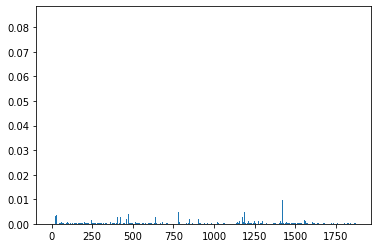

In [8]:
#evaluate tree models 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def evaluate(tree, name):
  y_pred = tree.predict(X_test)
  print(name, accuracy_score(y_pred, y_test))

  plot_confusion_matrix(tree, X_test, y_test)  
  plt.show()
  
  print(classification_report(y_test,y_pred))

  feat_importances = pd.Series(tree.feature_importances_, index=data.columns)
  feat_importances.nlargest(10).plot(kind='barh')
  plt.show()

  for i,v in enumerate(feat_importances.nlargest(10)):
    print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([x for x in range(len(feat_importances))], feat_importances)
    plt.show()

evaluate(decision_tree, "Decision Tree")
evaluate(extra_trees, "Extra Trees")
evaluate(random_forest, "Random Forest")

In [9]:
#finetuning best model

In [10]:
#make predictions 
coconut = pd.read_csv('/content/coconut.csv')
predictions = model.predict(coconut)
prob = model.predict_proba(coconut)

print(predictions.value_count())

results = pd.concat([coconut[0], predictions, prob])
print(results)
print(results.describe())

print(results.value_count())

for row in results:
  if row[1] == 0:
    print(row)
    


FileNotFoundError: ignored